# STA 208: Homework 5

## Instructions

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements (beginning with __Exercise X.X__).  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax

In the conceptual exercises you should provide an explanation, with math when necessary, for any answers.  When answering with math you should use basic LaTeX, as in 
$$E(Y|X=x) = \int_{\mathcal{Y}} f_{Y|X}(y|x) dy = \int_{\mathcal{Y}} \frac{f_{Y,X}(y,x)}{f_{X}(x)} dy$$
for displayed equations, and $R_{i,j} = 2^{-|i-j|}$ for inline equations.  (To see the contents of this cell in markdown, double click on it or hit Enter in escape mode.)  To see a list of latex math symbols see here: http://web.ift.uib.no/Teori/KURS/WRK/TeX/symALL.html

When writing pseudocode, you should use enumerated lists, such as 

__Algorithm: Ordinary Least Squares Fit__
(Input: X, y; 
Output: $\beta$)
1. Initialize the $p \times p$ Gram matrix, $G \gets 0$, and the vector $b \gets 0$.
2. For each sample, $x_i$:
 1. $G \gets G + x_i x_i^\top$.
 2. $b \gets b + y_i x_i$
3. Solve the linear system $G \beta = b$ and return $\beta$


__Exercise 1__ Recall the adaboost algorithm for $y_i \in \{-1,1\}$...

1. Initialize the observed weights $w^{(1)}_i \gets 1/n$, $t \gets 1$.
1. For $t = 1,\ldots,T$
 1. Get a classifier $f_t(x) \in \{-1,1\}$
 1. Get the weighted error: $\epsilon_t = \sum_{i=1}^n w_i^{(t)} 1\{ f_t(x_i) \ne y_i \}$
 1. Let $\alpha_t \gets \log (\epsilon_t / (1 - \epsilon_t))$
 1. $w^{(t+1)}_i \gets w^{(t)}_i \exp ( -y_i f_t(x_i) \alpha_t )$ for all i.
 1. Let $Z_t \gets \sum_{i=1}^n w^{(t)}_i$, and $w^{(t+1)}_i \gets w_i^{(t+1)} / Z_t$ for all i.
1. Output the classifier: $$\hat y(x) = {\rm sign}\left( \sum_{t=1}^T \alpha_t f_t(x) \right)$$

We will demonstrate that the training error is bounded if each of these classifiers is a weak learner.  To this end, let $\epsilon_t = \frac 12 - \gamma_t$.  
If we can show that the training error is bounded by
$$ \prod_{t=1}^T \sqrt{2 \epsilon_t (1- \epsilon_t)} $$ then
we will see that the training error is bounded by
$$ \exp\left( - 2 \sum_{t=1}^T \gamma_t^2 \right) $$
because $\sqrt{2 \epsilon_t(1 - \epsilon_t)} \le \exp(2 \gamma_t^2)$.

__Exercise 1.1__ Demonstrate that 
$$ w^{(T+1)}_i = \frac 1n \frac{\exp(- y_i f(x_i))}{\prod_{t=1}^T Z_t}$$
where $f(x) = \sum_{t=1}^T \alpha_t f_t(x)$.

According to D,E we know $w^{(t+1)}_i \gets w^{(t)}_i \exp ( -y_i f_t(x_i) \alpha_t )$ for all i. and $Z_t \gets \sum_{i=1}^n w^{(t)}_i$, and $w^{(t+1)}_i \gets w_i^{(t+1)} / Z_t$ for all i. Then we know $$w^{(T+1)}_i=\frac{w^{(T+1)}_i}{Z_T}=\frac{w^{(T)}_i \exp ( -y_i f_T(x_i) \alpha_T )}{Z_T}$$ we can do the same transform to $w_i^t$ we can got $$\frac{w^{(T)}_i \exp ( -y_i f_T(x_i) \alpha_T )}{Z_T}=\frac{w^{(T-1)}_i\exp ( -y_i f_T(x_i)\alpha_T \exp ( -y_i f_{T-1}(x_i) \alpha_{T-1} )}{Z_TZ_{T-1}}$$ we can do this transform continualy and we know $w^{(1)}_i \gets 1/n$, $t \gets 1$ so when t reach 1 we got$$ w^{(T+1)}_i = \frac 1n \frac{\exp(- y_i \sum_{t=1}^{T}f_t(x_i)a_{t})}{\prod_{t=1}^T Z_t}$$ Since we know $f(x) = \sum_{t=1}^T \alpha_t f_t(x)$. So we can got the final expression$$ w^{(T+1)}_i = \frac 1n \frac{\exp(- y_i f(x_i))}{\prod_{t=1}^T Z_t}$$

__Exercise 1.2__ Using this, show that the training error, $\frac 1n \sum_{i=1}^n 1\{ y_i \ne \hat y(x_i)\}$ is bounded by $\prod_{t=1}^T Z_t$.  Hint: use the fact that $1\{ z < 0\} \le \exp(-z)$.

$$\begin{align*}
\frac 1n \sum_{i=1}^n 1\{ y_i \ne \hat y(x_i)\} & =\frac 1n \sum_{i=1}^n 1\{ y_i(\sum_{t=1}^T \alpha_t f_t(x_i))<0\}\\
& \leq \frac 1n \sum_{i=1}^n \exp(-\sum_{t=1}^Ty_i\alpha_t f_t(x_i)) \qquad \text{according to hint}\\
& =\frac 1n \sum_{i=1}^n \prod_{t=1}^T\exp(-y_i\alpha_t f_t(x_i))\\
& =\frac 1n \sum_{i=1}^n \frac{w_i^{2}Z_1}{w_i^{1}}\frac{w_i^{3}Z_1}{w_i^{2}}...\frac{w_i^{T+1}Z_1}{w_i^{T}}\qquad \text{according to D,E}\\
& =\frac 1n \sum_{i=1}^n \prod_{t=1}^T Z_t \frac{w_i^{T+1}}{w_i^{1}} \qquad\text{since }w^{(1)}_i \gets 1/n, \sum_{i=1}^nw_{(i)}^{T+1}=1\\
& =\prod_{t=1}^T Z_t
\end{align*}$$

__Exercise 1.3__ Show that 
$$ Z_t = \sqrt{2 \epsilon_t (1 - \epsilon_t)}.$$

$$
\begin{align*}
Z_t & = \sum_{i=1}^nw^{(t+1)}_i\\
& = \sum_{i=1}^nw^{(t)}_i\exp(-y_if(x_i)a_{t})\qquad \text{according to D}\\
& =\sum_{i=1}^nw^{(t)}_i\exp(\log(\frac{1-\epsilon}{\epsilon})^{-\frac{1}{2}y_if(x_i)} )\qquad \text{according to C}\\
& =\sum_{i=1}^n w_i^{(t)} 1\{ f_t(x_i) \ne y_i \}\exp(\log(\frac{1-\epsilon}{\epsilon})^{-\frac{1}{2}y_if(x_i)} )+\sum_{i=1}^n w_i^{(t)} 1\{ f_t(x_i) = y_i \}\exp(\log(\frac{1-\epsilon}{\epsilon})^{-\frac{1}{2}y_if(x_i)} )\\
& =\epsilon(\frac{1-\epsilon}{\epsilon})^{\frac{1}{2}}+(1-\epsilon)(\frac{1-\epsilon}{\epsilon})^{-\frac{1}{2}}\\
& =2\sqrt{ \epsilon_t (1 - \epsilon_t)}\qquad\text{if } f_t(x_i) \ne y_i, y_if(x_i)=-1
\end{align*}
$$

## Bank Dataset
The following dataset can be found at <a href="https://archive.ics.uci.edu/ml/datasets/Bank+Marketing">UCI ML repo</a>.

In [1]:
import pandas as pd
import numpy as np

In [2]:
bank = pd.read_csv('bank/bank-full.csv',sep=";")

In [3]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
X = bank.iloc[:,:-1]
y = bank['y']
y = (y == 'yes')*1
X = np.array(X)

In [6]:
from sklearn.preprocessing import OneHotEncoder 

__Exercise 2.1__ (30 pts) Predict y from X using kernel SVMs, random forests, and adaboost (see the sklearn.ensembles package).  Tune the random forest using the out-of-bag error.  Tune everything else using cross-validation, and assess the models using a separate test set with ROC, PR, confusion matrices.  Write a paragraph about the relative performances of the algorithms and any observations that you've made.

I firstly Tune the parameter of random forest using out-of-bag error, then I use grid search method to tune parameter of SVM and Adaboost, the answers are listed in below table. After that I plot the PR, ROC curve, the answer show that the Random forest perform best, and adaboost perform a little bit better than linear SVM. When we look at confusion matrix, we can find out, although random forest perform best, the prediction on class 1 using adaboost is more accurate than random forest, the probable reason is that adaboost will give wrong classified data more weight, so it will predict lesser common class more accurately. What's more, there is one thing I find is that when we tune the min-sample-split parameter of random forest, if we increase the split over two, the performance will drop which is weird, since split only by two node quite likyly to overfit. For SVM, it will run very slow, no matter I use 'linear' or 'rbf' kernel, when compared with tree based methods.



random forest||SVM||Adaboost||
---- | ---| ---| ---| ---| ---|
_parameter_ | _tuned value_|_parameter_ | _tuned value_|_parameter_ | _tuned value_
max_depth|11|kernel|linear|max_depth|2
max_leaf_nodes|500|bandwidth|0.01|max_leaf_nodes|10
min_samples_leaf|10|||min_samples_leaf|1
min_samples_split|0.1|||min_samples_split|0.9
min_weight_fraction_leaf|0.1|||n_estimaor|30
learning_rate|0.1

In [4]:
bank = pd.get_dummies(bank,drop_first=True,sparse=True)
X = bank.iloc[:,:-1]

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from sklearn.model_selection import GridSearchCV  
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, roc_curve,confusion_matrix, classification_report,precision_score

%matplotlib inline
kfold = KFold(n_splits=5)

### tune random forest
#### Tune max_depth and max_leaf_nodes

In [49]:
maxd, maxleaf, scores = [], [], []
for i,j in itertools.product(range(2,10,2),[10,50,100,200,500]):
    RFC=RandomForestClassifier(max_depth=i,max_leaf_nodes=j, min_samples_leaf=1,
                           min_samples_split=2,min_weight_fraction_leaf=0.0,oob_score=True)
    score = RFC.fit(X,y).oob_score_
    maxd.append(i); maxleaf.append(j);scores.append(score)
    print('max_depth:',i,'max_leaf_nodes:',j,'score',score)
index=np.argmax(scores)
print('best:','max_depth:',maxd[index],'max_leaf_nodes:',maxleaf[index],'score',scores[index])

('max_depth:', 2, 'max_leaf_nodes:', 10, 'score', 0.88520492800424677)
('max_depth:', 2, 'max_leaf_nodes:', 50, 'score', 0.8840105284112274)
('max_depth:', 2, 'max_leaf_nodes:', 100, 'score', 0.88620026099842963)
('max_depth:', 2, 'max_leaf_nodes:', 200, 'score', 0.88752737165734008)
('max_depth:', 2, 'max_leaf_nodes:', 500, 'score', 0.88518280949326489)
('max_depth:', 4, 'max_leaf_nodes:', 10, 'score', 0.88688593483886669)
('max_depth:', 4, 'max_leaf_nodes:', 50, 'score', 0.89221649598549024)
('max_depth:', 4, 'max_leaf_nodes:', 100, 'score', 0.89411868792992855)
('max_depth:', 4, 'max_leaf_nodes:', 200, 'score', 0.89044701510694302)
('max_depth:', 4, 'max_leaf_nodes:', 500, 'score', 0.89288005131494552)
('max_depth:', 6, 'max_leaf_nodes:', 10, 'score', 0.8922607330074539)
('max_depth:', 6, 'max_leaf_nodes:', 50, 'score', 0.89438411006171059)
('max_depth:', 6, 'max_leaf_nodes:', 100, 'score', 0.89299064386985472)
('max_depth:', 6, 'max_leaf_nodes:', 200, 'score', 0.89380902877618273)


the answer show that for both value, the higher the node and depth, the better the performance, in order to find the optimal one, I will try to set higher value.

In [54]:
maxd, maxleaf, scores = [], [], []
for i,j in itertools.product(range(8,20,3),[500,1000,2000]):
    RFC=RandomForestClassifier(max_depth=i,max_leaf_nodes=j, min_samples_leaf=1,
                           min_samples_split=2,min_weight_fraction_leaf=0.0,oob_score=True)
    score = RFC.fit(X,y).oob_score_
    maxd.append(i); maxleaf.append(j);scores.append(score)
    print('max_depth:',i,'max_leaf_nodes:',j,'score',score)
index=np.argmax(scores)
print('best:','max_depth:',maxd[index],'max_leaf_nodes:',maxleaf[index],'score',scores[index])

('max_depth:', 8, 'max_leaf_nodes:', 500, 'score', 0.89626418349516712)
('max_depth:', 8, 'max_leaf_nodes:', 1000, 'score', 0.89706044989051337)
('max_depth:', 8, 'max_leaf_nodes:', 2000, 'score', 0.89730375351131364)
('max_depth:', 11, 'max_leaf_nodes:', 500, 'score', 0.89878569374709694)
('max_depth:', 11, 'max_leaf_nodes:', 1000, 'score', 0.89644113158302186)
('max_depth:', 11, 'max_leaf_nodes:', 2000, 'score', 0.89692773882462229)
('max_depth:', 14, 'max_leaf_nodes:', 500, 'score', 0.89661807967087659)
('max_depth:', 14, 'max_leaf_nodes:', 1000, 'score', 0.89540156156687534)
('max_depth:', 14, 'max_leaf_nodes:', 2000, 'score', 0.8946937692154564)
('max_depth:', 17, 'max_leaf_nodes:', 500, 'score', 0.8984096790604057)
('max_depth:', 17, 'max_leaf_nodes:', 1000, 'score', 0.89688350180265863)
('max_depth:', 17, 'max_leaf_nodes:', 2000, 'score', 0.89378691026520096)
('best:', 'max_depth:', 11, 'max_leaf_nodes:', 500, 'score', 0.89878569374709694)


the answer show that the best max_depth is 11, and best max_leaf_nodes are 500.

#### Tune min_samples_leaf and min_samples_spl
using the best parameter for best max_depth and best max_leaf_nodes, we can continually tune other parameters.

In [57]:
minleaf, minsplit, scores = [], [], []
for i,j in itertools.product([1,10,30,50],[i/10.0 for i in range(1,10)]):
    RFC=RandomForestClassifier(max_depth=11,max_leaf_nodes=500, min_samples_leaf=i,
                           min_samples_split=j,min_weight_fraction_leaf=0.0,oob_score=True)
    score = RFC.fit(X,y).oob_score_
    minleaf.append(i); minsplit.append(j);scores.append(score)
    print('min_samples_leaf:',i,'min_samples_spl:',j,'score',"%.6f"%score)
index=np.argmax(scores)
print('best:','min_samples_leaf:',minleaf[index],'min_samples_spl:',minsplit[index],'score',scores[index])

('min_samples_leaf:', 1, 'min_samples_spl:', 0.1, 'score', '0.883502')
('min_samples_leaf:', 1, 'min_samples_spl:', 0.2, 'score', '0.884718')
('min_samples_leaf:', 1, 'min_samples_spl:', 0.3, 'score', '0.883546')
('min_samples_leaf:', 1, 'min_samples_spl:', 0.4, 'score', '0.883612')
('min_samples_leaf:', 1, 'min_samples_spl:', 0.5, 'score', '0.883015')
('min_samples_leaf:', 1, 'min_samples_spl:', 0.6, 'score', '0.883015')
('min_samples_leaf:', 1, 'min_samples_spl:', 0.7, 'score', '0.883015')
('min_samples_leaf:', 1, 'min_samples_spl:', 0.8, 'score', '0.883015')
('min_samples_leaf:', 1, 'min_samples_spl:', 0.9, 'score', '0.883015')
('min_samples_leaf:', 10, 'min_samples_spl:', 0.1, 'score', '0.890071')
('min_samples_leaf:', 10, 'min_samples_spl:', 0.2, 'score', '0.886842')
('min_samples_leaf:', 10, 'min_samples_spl:', 0.3, 'score', '0.883082')
('min_samples_leaf:', 10, 'min_samples_spl:', 0.4, 'score', '0.887151')
('min_samples_leaf:', 10, 'min_samples_spl:', 0.5, 'score', '0.882993')
(

After finish tuning min_samples_leaf and min_samples_split, there only one weight left to be tune

In [65]:
weight, scores =  [], []
for i in [i/10.0 for i in range(1,6)]:
    RFC=RandomForestClassifier(max_depth=11,max_leaf_nodes=500, min_samples_leaf=10,
                           min_samples_split=0.1,min_weight_fraction_leaf=i,oob_score=True)
    score = RFC.fit(X,y).oob_score_
    weight.append(i);scores.append(score)
    print('min_weight_fraction_leaf:',i,'score',score)
index=np.argmax(scores)
print('best:','min_weight_fraction_leaf:',weight[index],'score',scores[index])

('min_weight_fraction_leaf:', 0.1, 'score', 0.88301519541704454)
('min_weight_fraction_leaf:', 0.2, 'score', 0.88301519541704454)
('min_weight_fraction_leaf:', 0.3, 'score', 0.88301519541704454)
('min_weight_fraction_leaf:', 0.4, 'score', 0.88301519541704454)
('min_weight_fraction_leaf:', 0.5, 'score', 0.88301519541704454)
('best:', 'min_weight_fraction_leaf:', 0.1, 'score', 0.88301519541704454)


Accordingly we have tuned all the parameters for random forest:
1. max_depth=11
2. max_leaf_nodes=500
3. min_samples_leaf=10
4. min_samples_split=0.1
5. min_weight_fraction_leaf=0.1

### Tune SVM
#### Tune bandwidth and ridge penalty 

In [5]:
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCVearchCV

In [32]:
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = [
  {'C': C_range, 'kernel': ['linear']},
  {'C': C_range, 'gamma': gamma_range , 'kernel': ['rbf']},
 ]
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X, y)
print("The best parameters are %s with a score of %0.4f" % (grid.best_params_, grid.best_score_))

"(The best parameters are {'C': 0.01, 'kernel': 'linear'}, with a score of 0.8935)"

### Tune adaboost
#### Tune n and ridge penalty 
Since the base estimator is decision tree classification, so I need to firstly tune decision trees. First of all, I tune max depth and max leaf nodes for decision trees

In [13]:
maxd, maxleaf, scores = [], [], []
for i,j in itertools.product(range(2,10,2),[10,50,100,200,500]):
    DTC=DecisionTreeClassifier(max_depth=i,max_leaf_nodes=j, min_samples_leaf=1,
                           min_samples_split=2,min_weight_fraction_leaf=0.0)
    score = cross_val_score(DTC,X,y,cv=kfold).mean()
    maxd.append(i); maxleaf.append(j);scores.append(score)
    print('max_depth:',i,'max_leaf_nodes:',j,'score',score)
index=np.argmax(scores)
print('best:','max_depth:',maxd[index],'max_leaf_nodes:',maxleaf[index],'score',scores[index])

('max_depth:', 2, 'max_leaf_nodes:', 10, 'score', 0.88765840505008842)
('max_depth:', 2, 'max_leaf_nodes:', 50, 'score', 0.88765840505008842)
('max_depth:', 2, 'max_leaf_nodes:', 100, 'score', 0.88765840505008842)
('max_depth:', 2, 'max_leaf_nodes:', 200, 'score', 0.88765840505008842)
('max_depth:', 2, 'max_leaf_nodes:', 500, 'score', 0.88765840505008842)
('max_depth:', 4, 'max_leaf_nodes:', 10, 'score', 0.8851814194625629)
('max_depth:', 4, 'max_leaf_nodes:', 50, 'score', 0.88675184157248366)
('max_depth:', 4, 'max_leaf_nodes:', 100, 'score', 0.88679607957292605)
('max_depth:', 4, 'max_leaf_nodes:', 200, 'score', 0.88679607957292605)
('max_depth:', 4, 'max_leaf_nodes:', 500, 'score', 0.88675184157248366)
('max_depth:', 6, 'max_leaf_nodes:', 10, 'score', 0.88272621043801069)
('max_depth:', 6, 'max_leaf_nodes:', 50, 'score', 0.88248303596449629)
('max_depth:', 6, 'max_leaf_nodes:', 100, 'score', 0.88193006340494695)
('max_depth:', 6, 'max_leaf_nodes:', 200, 'score', 0.88177523040339856)

so the best max_depth is 2 and best max_leaf_nodes in 10, then we can tune min_samples_leaf and min_samples_spl


In [21]:
minleaf, minsplit, scores = [], [], []
for i,j in itertools.product([1,10,30,50],[i/10.0 for i in range(1,10)]):
    DTC=DecisionTreeClassifier(max_depth=2,max_leaf_nodes=10, min_samples_leaf=i,
                           min_samples_split=j,min_weight_fraction_leaf=0.0)
    score = cross_val_score(DTC,X,y,cv=kfold).mean()
    minleaf.append(i); minsplit.append(j);scores.append(score)
    print('min_samples_leaf:',i,'min_samples_spl:',j,'score',"%.6f"%score)
index=np.argmax(scores)
print('best:','min_samples_leaf:',minleaf[index],'min_samples_spl:',minsplit[index],'score',scores[index],2)

('min_samples_leaf:', 1, 'min_samples_spl:', 0.1, 'score', '0.879873')
('min_samples_leaf:', 1, 'min_samples_spl:', 0.2, 'score', '0.881288')
('min_samples_leaf:', 1, 'min_samples_spl:', 0.3, 'score', '0.881288')
('min_samples_leaf:', 1, 'min_samples_spl:', 0.4, 'score', '0.881288')
('min_samples_leaf:', 1, 'min_samples_spl:', 0.5, 'score', '0.881288')
('min_samples_leaf:', 1, 'min_samples_spl:', 0.6, 'score', '0.881288')
('min_samples_leaf:', 1, 'min_samples_spl:', 0.7, 'score', '0.881288')
('min_samples_leaf:', 1, 'min_samples_spl:', 0.8, 'score', '0.881288')
('min_samples_leaf:', 1, 'min_samples_spl:', 0.9, 'score', '0.883013')
('min_samples_leaf:', 10, 'min_samples_spl:', 0.1, 'score', '0.879873')
('min_samples_leaf:', 10, 'min_samples_spl:', 0.2, 'score', '0.881288')
('min_samples_leaf:', 10, 'min_samples_spl:', 0.3, 'score', '0.881288')
('min_samples_leaf:', 10, 'min_samples_spl:', 0.4, 'score', '0.881288')
('min_samples_leaf:', 10, 'min_samples_spl:', 0.5, 'score', '0.881288')
(

So we got that the best parameter for min_sample_leaf is 1, and min_sample_split is 0.9. Then we can train the adaboost parameter n_estimator and learning rate.

In [28]:
DTC=DecisionTreeClassifier(max_depth=2,max_leaf_nodes=10, min_samples_leaf=1,
                           min_samples_split=0.9,min_weight_fraction_leaf=0.0)
nesti, lrate, scores = [], [], []
for i,j in itertools.product([10,50,100,1000],np.logspace(-6,1,7)):
    ABC = AdaBoostClassifier(base_estimator = DTC,n_estimators=i,learning_rate=j)
    score = cross_val_score(ABC,X,y,cv=kfold).mean()
    nesti.append(i); lrate.append(j);scores.append(score)
    print('n_estimate:',i,'learning_rate:',"%.6f"%j,'score',"%.6f"%score)
index=np.argmax(scores)
print('best:','n_estimate:',minleaf[index],'learning_rate:',minsplit[index],'score',scores[index],2)

('n_estimate:', 10, 'learning_rate:', '0.000001', 'score', '0.883013')
('n_estimate:', 10, 'learning_rate:', '0.000015', 'score', '0.883013')
('n_estimate:', 10, 'learning_rate:', '0.000215', 'score', '0.883013')
('n_estimate:', 10, 'learning_rate:', '0.003162', 'score', '0.883013')
('n_estimate:', 10, 'learning_rate:', '0.046416', 'score', '0.883367')
('n_estimate:', 10, 'learning_rate:', '0.681292', 'score', '0.881133')
('n_estimate:', 10, 'learning_rate:', '10.000000', 'score', '0.116987')
('n_estimate:', 50, 'learning_rate:', '0.000001', 'score', '0.883013')
('n_estimate:', 50, 'learning_rate:', '0.000015', 'score', '0.883013')
('n_estimate:', 50, 'learning_rate:', '0.000215', 'score', '0.883013')
('n_estimate:', 50, 'learning_rate:', '0.003162', 'score', '0.883411')
('n_estimate:', 50, 'learning_rate:', '0.046416', 'score', '0.883434')
('n_estimate:', 50, 'learning_rate:', '0.681292', 'score', '0.877882')
('n_estimate:', 50, 'learning_rate:', '10.000000', 'score', '0.116987')
('n_

so we can find that the best number of estimate is 30, and learning rate is 0.1.
### Analysis tuned model with ROC PRC curve

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)
RFC=RandomForestClassifier(max_depth=11,max_leaf_nodes=500, min_samples_leaf=10,
                           min_weight_fraction_leaf=0.1,oob_score=True)
RFC.fit(X_train,y_train)
prob = RFC.predict_proba(X_test)
rcffpr, rcftpr, rcfthr = roc_curve(y_test, prob[:,1])
rcfpre, rcfrec, rcfthresh = precision_recall_curve(y_test, prob[:,1])

svc = SVC(probability=True, C=0.01,kernel='linear')
svc.fit(X_train,y_train)
pred = svc.predict_proba(X_test)
svcfpr, svctpr, svcthr = roc_curve(y_test, pred[:,1])
svcpre, svcrec, svcthresh = precision_recall_curve(y_test, pred[:,1])

DTC=DecisionTreeClassifier(max_depth=2,max_leaf_nodes=10, min_samples_leaf=1,
                           min_samples_split=0.9,min_weight_fraction_leaf=0.0)
ABC = AdaBoostClassifier(base_estimator = DTC,n_estimators=30,learning_rate=0.1)
ABC.fit(X_train,y_train)
pred = ABC.predict_proba(X_test)
abcfpr, abctpr, abcthr = roc_curve(y_test, pred[:,1])
abcpre, abcrec, abcthresh = precision_recall_curve(y_test, pred[:,1])

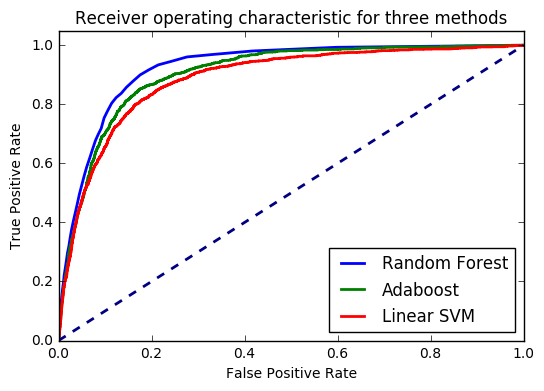

In [33]:
plt.figure()
lw = 2
plt.plot(rcffpr,rcftpr,lw=lw, label='Random Forest')
plt.plot(abcfpr,abctpr,lw=lw, label='Adaboost')
plt.plot(svcfpr,svctpr,lw=lw, label='Linear SVM')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for three methods')
plt.legend(loc="lower right")
plt.show()

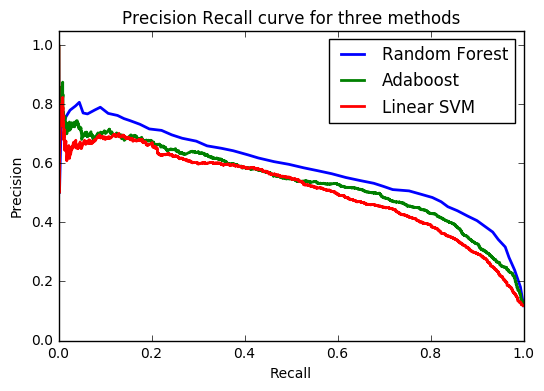

In [34]:
plt.figure()
lw = 2
plt.plot(rcfrec,rcfpre,lw=lw, label='Random Forest')
plt.plot(abcrec,abcpre,lw=lw, label='Adaboost')
plt.plot(svcrec,svcpre,lw=lw, label='Linear SVM')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall curve for three methods')
plt.legend(loc=1)
plt.show()

### Analysis tuned model with confusion matrix

In [24]:
svcpred = svc.predict(X_test)
rfcpred = RFC.predict(X_test)
abcpred = ABC.predict(X_test)

In [25]:
def plot_confusion_matrix(cm, classes, model, title='Confusion matrix (Normalized)',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('confusion matrix of {}'.format(model))
    plt.colorbar()
    plt.xticks(np.arange(2), classes)
    plt.yticks(np.arange(2), classes)
    plt.tight_layout()
    plt.xlabel('True label',rotation='horizontal', ha='right')
    plt.ylabel('Predicted label')
    plt.show()

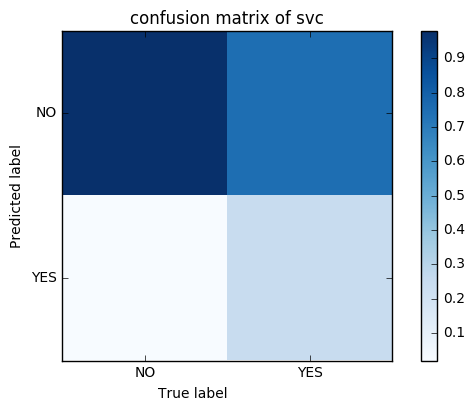

True          NO   YES
Predicted             
NO         11730  1198
YES          239   397
('precision:', 0.89405780005897961)


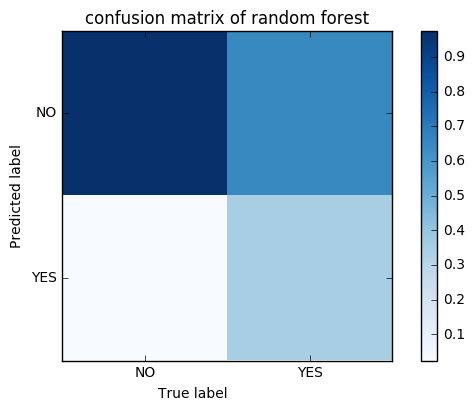

True          NO   YES
Predicted             
NO         11670  1037
YES          299   558
('precision:', 0.90150398112651131)


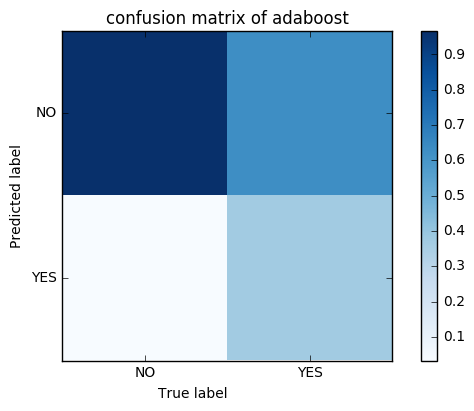

True          NO   YES
Predicted             
NO         11573  1006
YES          396   589
('precision:', 0.89663815983485695)


In [26]:
for i,j in zip(['svc','random forest','adaboost'],[svcpred,rfcpred,abcpred]):
    cm = confusion_matrix(y_test, j)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plot_confusion_matrix(cm_normalized.T, ['NO','YES'], i)
    cm_df = pd.DataFrame(cm.T, index=['NO','YES'], columns=['NO','YES'])
    cm_df.index.name = 'Predicted'
    cm_df.columns.name = 'True'
    print(cm_df)
    print('precision:',sum(y_test==j)/float(len(y_test)))

__Exercise 2.2__ (Bonus: 20 pts) Using theano, code online stochastic gradient method for logistic regression with a single hidden layer with three units that uses the sigmoid activation function.  Compare the test error to the previous methods.

You can use the code here: http://deeplearning.net/tutorial/mlp.html

You may want to use the onehotencoder to encode the categorical variables in X.

I firstly do the stochastic gradient method for logistic regression with a single hidden layer with three units that uses the sigmoid activation function by using the code provided by professor, this method perform worst when compared with previous methods, the accuracy is 88.24% which means all value are predicted as class 0. Then I do a little bit change the activation function to binary crossentropy, the accuracy increase a little bit which is 89.82%, this answer perform better adaboost and svm, but the accuracy will not increase when I increase iteration.

In [7]:
import theano
from theano import *
import theano.tensor as T
from sklearn.preprocessing import scale

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)
X_train=scale(X_train)
X_test=scale(X_test)
y_train = y_train.values

In [77]:
p = 42
H = 3
x = T.vector('x')
W1 = theano.shared(value = np.random.randn(p*H).reshape((H,p)), name= 'W1')
w2 = theano.shared(value = np.random.randn(H), name= 'w2')
u1 = T.dot(W1,x)
h = T.nnet.relu(u1)
u2 = T.dot(h,w2)
y = T.scalar('y')
prob = T.nnet.sigmoid(u2)
R = - y * T.log(prob) - (1 - y) * T.log(1 - prob)
w2g = T.grad(R,w2)
W1g = T.grad(R,W1)
learn_rate = .05
W_updates = [(W1, W1 - learn_rate * W1g),
            (w2, w2 - learn_rate * w2g)]
grad_step = theano.function([x,y],R,updates=W_updates)

In [117]:
for num in range(10):
    n = X_train.shape[0]
    for i in range(n):
        grad_step(X_train[i,:],y_train[i])

In [79]:
W1.get_value().shape,w2.get_value()

((3L, 42L), array([-0.13664027, -0.57789964, -0.51915949]))

In [118]:
ypred = np.array([prob.eval({x: X}) > .5 for X in X_test ])
print('precision:',sum(y_test==ypred)/float(len(y_test)))

precision: 0.882409318785


#### method 2

In [46]:
def encode_labels(labels, max_index):
    """Encode the labels into binary vectors."""
    # Allocate the output labels, all zeros.
    encoded = np.zeros((labels.shape[0], max_index + 1))
    
    # Fill in the ones at the right indices.
    for i in xrange(labels.shape[0]):
        encoded[i, labels[i]] = 1
    return encoded

labeled = encode_labels(y_train, 1)

In [50]:

W1_shape = (3, 42)
b1_shape = 3
W2_shape = (2, 3)
b2_shape = 2
W1 = shared(np.random.random(W1_shape) - 0.5, name="W1")
b1 = shared(np.random.random(b1_shape) - 0.5, name="b1")
W2 = shared(np.random.random(W2_shape) - 0.5, name="W2")
b2 = shared(np.random.random(b2_shape) - 0.5, name="b2")
x = T.dmatrix("x") # N x 784
labels = T.dmatrix("labels") # N x 10

hidden = T.nnet.sigmoid(x.dot(W1.transpose()) + b1)
output = T.nnet.softmax(hidden.dot(W2.transpose()) + b2)
prediction = T.argmax(output, axis=1)
reg_lambda = 0.0001
regularization = reg_lambda * ((W1 * W1).sum() + (W2 * W2).sum() + (b1 * b1).sum() + (b2 * b2).sum())
cost = T.nnet.binary_crossentropy(output, labels).mean() + regularization
#sigmoid
compute_prediction = function([x], prediction)

alpha = T.dscalar("alpha")
weights = [W1, W2, b1, b2]
updates = [(w, w - alpha * grad(cost, w)) for w in weights]
train_nn = function([x, labels, alpha],
                 cost,
                 updates=updates)
alpha = 10.0
costs = []
while True:
    costs.append(float(train_nn(X_train, labeled, alpha)))

    if len(costs) % 10 == 0:
        print 'Epoch', len(costs), 'with cost', costs[-1], 'and alpha', alpha
    if len(costs) > 2 and costs[-2] - costs[-1] < 0.0001:
        if alpha < 0.2:
            break
        else:
            alpha = alpha / 1.5


Epoch 10 with cost 0.243507087549 and alpha 10.0
Epoch 20 with cost 0.22387918907 and alpha 10.0
Epoch 30 with cost 0.220995024936 and alpha 10.0
Epoch 40 with cost 0.219710703211 and alpha 10.0
Epoch 50 with cost 0.21944040915 and alpha 0.173415299158


In [51]:
prediction = compute_prediction(X_test)
print('precision:',sum(y_test==prediction)/float(len(y_test)))

('precision:', 0.89826010026540848)
